# 라이브러리 설치

필요한 라이브러리를 설치합니다.

* <b>influxdb_client</b>는 influxDB에 접속해서 쿼리를 날리거나, 테이블 정보를 통째로 가져오거나 하는 일을 할 때 필요합니다.
* <b>pandas</b>는 읽어온 DB 데이터를 이용한 각종 계산작업을 할 때 필요합니다.
* <b>matplotlib</b>는 계산한 자료를 그래프로 시각화하는데 필요한 라이브러리 입니다.

In [1]:
! pip install influxdb_client pandas matplotlib

# InfluxDB에 접속해서 데이터 가져오기.

* InfluxDB가 서비스되고 있는 서버의 IP를 알아야 합니다.
* API token을 발급받아야 합니다. (https://docs.influxdata.com/influxdb/cloud/admin/tokens/create-token/) token의 발급은 시스템 관리자에게 문의하는 것도 방법입니다.
* 우리의 data가 저장되는 DB의 "org" "bucket" 등을 확인합니다.
* "_measurement", "_field" 등도 확인해야 합니다.
* 우리의 data가 저장되는 "device"도 설정되어 있다면 확인해서 그 값을 갖고 있어야 합니다.

### 가져온 데이터는 "output_1.csv" 파일에 저장합니다.
* 나중에 다시 파일을 읽어들여서 이런저런 계산 작업을 해볼 수 있습니다.

In [2]:
from influxdb_client import InfluxDBClient

# InfluxDB connection details
url = "http://223.130.146.203:8086"
token = "qy0oLMzJCbHfxPN7a-29e_DEXKegegg2pILuletLFnw36cKZkFnuMnlj72QXDNB2JqHMS8NOpM2kCYiALrtoag=="
org = "IoT-Project"
bucket = "dkswIOT"

client = InfluxDBClient(url=url, token=token, org=org)
query_api = client.query_api()

query = '''
from(bucket: "dkswIOT")
  |> range(start: -2h, stop: -1h)
  |> filter(fn: (r) => r["_measurement"] == "vib")
  |> filter(fn: (r) => r["_field"] == "x_g")
  |> filter(fn: (r) => r["device"] == "dkels-241008-013/vib")
'''

# Execute query and get CSV iterator
result = query_api.query_csv(query)

# Save to CSV
with open("output_1.csv", "w") as f:
    for line in result:
        f.write(",".join(line) + "\n")  # Convert list to CSV row

# 데이터 확인해보기
* Pandas dataframe 형태로 읽어 들여서 데이터를 확인합니다.

In [3]:
import pandas as pd

# Load CSV into a DataFrame
df = pd.read_csv("output_1.csv", skiprows=3)

# Display the first few rows
print(df.head())
print(df["_value"])


   Unnamed: 0  result  table                          _start  \
0         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
1         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
2         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
3         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
4         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   

                            _stop                 _time  _value _field  \
0  2025-03-22T22:57:41.848275553Z  2025-03-22T21:57:42Z  0.0124    x_g   
1  2025-03-22T22:57:41.848275553Z  2025-03-22T21:57:43Z  0.0135    x_g   
2  2025-03-22T22:57:41.848275553Z  2025-03-22T21:57:44Z  0.0122    x_g   
3  2025-03-22T22:57:41.848275553Z  2025-03-22T21:57:45Z  0.0130    x_g   
4  2025-03-22T22:57:41.848275553Z  2025-03-22T21:57:46Z  0.0116    x_g   

  _measurement                device  
0          vib  dkels-241008-013/vib  
1          vib  dkels-241008-013/vib  
2          vib  dkels-241008-013/vib  
3          vib

# 이제 그래프를 그려봅시다.
* 원본 데이터를 그려봅니다. (시계열 그래프입니다.)
* 원본 데이터로 부터 1분 평균을 구해서 원본데이터와 함께 그려봅니다.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert '_time' column to datetime format
df['_time'] = pd.to_datetime(df['_time'], format='mixed')

# Sort by time (optional, ensures proper ordering)
df = df.sort_values(by="_time")

In [5]:
print(df.head())

   Unnamed: 0  result  table                          _start  \
0         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
1         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
2         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
3         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   
4         NaN     NaN      0  2025-03-22T21:57:41.848275553Z   

                            _stop                     _time  _value _field  \
0  2025-03-22T22:57:41.848275553Z 2025-03-22 21:57:42+00:00  0.0124    x_g   
1  2025-03-22T22:57:41.848275553Z 2025-03-22 21:57:43+00:00  0.0135    x_g   
2  2025-03-22T22:57:41.848275553Z 2025-03-22 21:57:44+00:00  0.0122    x_g   
3  2025-03-22T22:57:41.848275553Z 2025-03-22 21:57:45+00:00  0.0130    x_g   
4  2025-03-22T22:57:41.848275553Z 2025-03-22 21:57:46+00:00  0.0116    x_g   

  _measurement                device  
0          vib  dkels-241008-013/vib  
1          vib  dkels-241008-013/vib  
2          vib  dkels-241008-

1. 원본 데이터를 그래프로 그려보기.

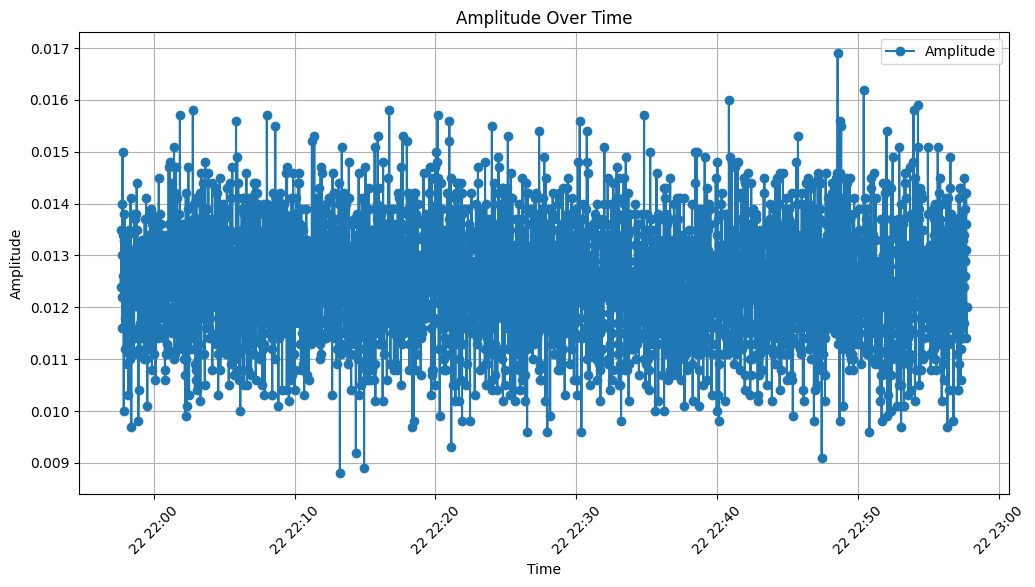

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df["_time"], df["_value"], marker="o", linestyle="-", label="Amplitude")

# Formatting
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Amplitude Over Time")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()


2. 1 분 단위로 데이터를 모아 평균을 내고, 그걸 원본 데이터와 함께 그려보기.

In [7]:
# Load CSV
df = pd.read_csv("output_1.csv", skiprows=3)

# Convert '_time' to datetime
df['_time'] = pd.to_datetime(df['_time'], errors='coerce')

# Remove timezone (convert to naive datetime)
df['_time'] = df['_time'].dt.tz_localize(None)

# Ensure '_value' is numeric
df['_value'] = pd.to_numeric(df['_value'], errors='coerce')

# Set '_time' as the index
df.set_index('_time', inplace=True)

In [8]:
# Compute 1-minute resampling
df_resampled = df.resample('1min').mean(numeric_only=True)

# Compute 5-minute running average
df['rolling_avg'] = df['_value'].rolling('5min', min_periods=1).mean()

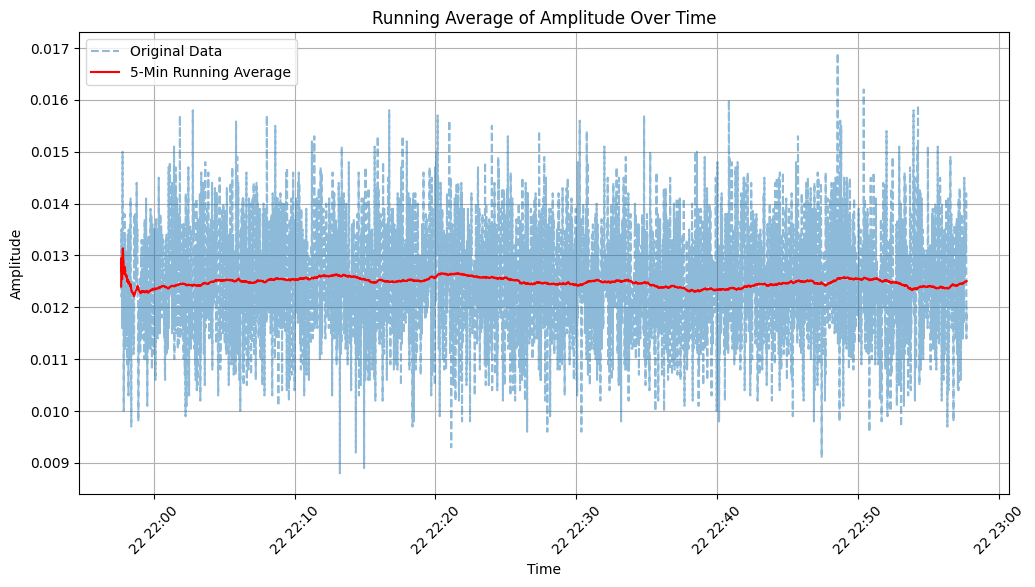

In [9]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['_value'], alpha=0.5, label="Original Data", linestyle='dashed')
plt.plot(df.index, df['rolling_avg'], color='red', label="5-Min Running Average")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Running Average of Amplitude Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Save cleaned data
df.to_csv("output_with_running_avg.csv")